In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal

In [111]:
real_data = pd.read_csv("C:\\data\\offset_correction_data.csv")
sim_data = pd.read_csv("C:\\simulation\\simulation_data.csv")

In [112]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9107 entries, 0 to 9106
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                9107 non-null   object 
 1   step                9107 non-null   int64  
 2   current[mA]         9107 non-null   float64
 3   real_currentx10[V]  9107 non-null   float64
 4   RANGE1[V]           9107 non-null   float64
 5   RANGE2[V]           9107 non-null   float64
 6   RANGE3[V]           9107 non-null   float64
 7   RANGE4[V]           9107 non-null   float64
 8   24bit[bin]          9107 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 640.5+ KB


In [113]:
sim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9107 entries, 0 to 9106
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         9107 non-null   int64  
 1   current[mA]  9107 non-null   float64
 2   RANGE1[V]    9107 non-null   float64
 3   RANGE2[V]    9107 non-null   float64
 4   RANGE3[V]    9107 non-null   float64
 5   RANGE4[V]    9107 non-null   float64
 6   24bit[bin]   9107 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 498.2 KB


In [114]:
filter_real = real_data["step"] == 38
filtered_real_data = real_data[filter_real]
filtered_real_data

,time,step,current[mA],real_currentx10[V],RANGE1[V],RANGE2[V],RANGE3[V],RANGE4[V],24bit[bin]
8867,10:02:09,38,0.1,0.999075,4.621749,5.652757,5.668241,5.664007,8133698
8868,10:02:14,38,0.1,0.999070,4.895293,5.652784,5.668260,5.664042,8133670
8869,10:02:19,38,0.1,0.999079,4.896903,5.652762,5.668278,5.664040,8133670
8870,10:02:24,38,0.1,0.999066,4.896914,5.652771,5.668249,5.664023,8133679
8871,10:02:29,38,0.1,0.999054,4.897008,5.652750,5.668254,5.663959,8133672
...,...,...,...,...,...,...,...,...,...
9102,10:21:44,38,0.1,0.999061,4.896916,5.652843,5.668347,5.664105,8133431
9103,10:21:49,38,0.1,0.999064,4.896872,5.652841,5.668354,5.664078,8133454
9104,10:21:54,38,0.1,0.999066,4.896895,5.652839,5.668331,5.664125,8133446
9105,10:21:59,38,0.1,0.999046,4.896870,5.652844,5.668330,5.664150,8133453


In [115]:
filter_sim = sim_data["step"] == 38
filtered_sim_data = sim_data[filter_sim]
filtered_sim_data

,step,current[mA],RANGE1[V],RANGE2[V],RANGE3[V],RANGE4[V],24bit[bin]
8867,38,0.1,5.0,50.0,500.0,5000.0,8379296
8868,38,0.1,5.0,50.0,500.0,5000.0,8379296
8869,38,0.1,5.0,50.0,500.0,5000.0,8379296
8870,38,0.1,5.0,50.0,500.0,5000.0,8379296
8871,38,0.1,5.0,50.0,500.0,5000.0,8379296
...,...,...,...,...,...,...,...
9102,38,0.1,5.0,50.0,500.0,5000.0,8379296
9103,38,0.1,5.0,50.0,500.0,5000.0,8379296
9104,38,0.1,5.0,50.0,500.0,5000.0,8379296
9105,38,0.1,5.0,50.0,500.0,5000.0,8379296


In [116]:
def statistical_analysis(range_name, voltage_column_name):
    """ This function does statistical analysis on data"""
    step_mean = []
    step_list = []
    current_list = []
    for i in range(38):
        filter1 = range_name['step'] == i + 1  # This 2 lines filters data according to step number
        filtered_range = range_name[filter1]
        volt_list = filtered_range[voltage_column_name] # This line takes voltage's values from filter data
        currents = filtered_range["current[mA]"] # This line takes current's values from filter data
        current_values = [current_value for current_value in currents]
        volt_values = [] # For every step it clears list of voltage's values
        for volt in volt_list:
            volt_values.append(float(volt))
        volt_values = volt_values[5::] # ignore first 10 values 
        current_list.append(current_values[0]) # Add only one current's value 
        step_list.append(i+1) # Step number
        step_mean.append(np.mean(volt_values))
    statistic_list = [step_list, current_list, step_mean] # Results in a list
    return statistic_list # Function return list

In [117]:
real_range1 = real_data[["time", "step", "current[mA]", "RANGE1[V]"]]
real_range2 = real_data[["time", "step", "current[mA]", "RANGE2[V]"]]
real_range3 = real_data[["time", "step", "current[mA]", "RANGE3[V]"]]
real_range4 = real_data[["time", "step", "current[mA]", "RANGE4[V]"]]
real_Adc_24bit = real_data[["time", "step", "current[mA]", "24bit[bin]"]]
real_range1

,time,step,current[mA],RANGE1[V]
0,21:43:14,1,0.0,-0.000003
1,21:43:19,1,0.0,0.000003
2,21:43:24,1,0.0,0.000003
3,21:43:29,1,0.0,-0.000007
4,21:43:34,1,0.0,0.000004
...,...,...,...,...
9102,10:21:44,38,0.1,4.896916
9103,10:21:49,38,0.1,4.896872
9104,10:21:54,38,0.1,4.896895
9105,10:21:59,38,0.1,4.896870


In [118]:
real_range4_results = statistical_analysis(real_range4, 'RANGE4[V]')
real_range3_results = statistical_analysis(real_range3, 'RANGE3[V]')
real_range2_results = statistical_analysis(real_range2, 'RANGE2[V]')
real_range1_results = statistical_analysis(real_range1, 'RANGE1[V]')
real_Adc_24bit_results = statistical_analysis(real_Adc_24bit, '24bit[bin]')
real_range4_results

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [0.0,
  1e-05,
  2e-05,
  2.9999999999999997e-05,
  4e-05,
  5e-05,
  5.9999999999999995e-05,
  7e-05,
  8e-05,
  9e-05,
  0.0001,
  0.0002,
  0.0003,
  0.0004,
  0.0005,
  0.0006,
  0.0007,
  0.0008,
  0.0009,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.006,
  0.006999999999999999,
  0.008,
  0.009000000000000001,
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1],
 [-1.0330011599821665e-05,
  0.46891371261532955,
  0.9657837901855423,
  1.4634687175897976,
  1.9537098711217131,
  2.4332323608238404,
  2.921365084781287,
  3.4253626002706485,
  3.9106638000578826,
  4.398710065972777,
  4.887974001972776,
  5.664732010653627,
  5.664755961462139,
  5.664735901589797,
  5.664685961036605,
  5.664643757206819,
  5.664582675334478,
  5.66

In [119]:
sim_range1 = sim_data[["step", "current[mA]", "RANGE1[V]"]]
sim_range2 = sim_data[["step", "current[mA]", "RANGE2[V]"]]
sim_range3 = sim_data[["step", "current[mA]", "RANGE3[V]"]]
sim_range4 = sim_data[["step", "current[mA]", "RANGE4[V]"]]
sim_Adc_24bit = sim_data[["step", "current[mA]", "24bit[bin]"]]
sim_range1

,step,current[mA],RANGE1[V]
0,1,0.0,0.0
1,1,0.0,0.0
2,1,0.0,0.0
3,1,0.0,0.0
4,1,0.0,0.0
...,...,...,...
9102,38,0.1,5.0
9103,38,0.1,5.0
9104,38,0.1,5.0
9105,38,0.1,5.0


In [120]:
sim_range4_results = statistical_analysis(sim_range4, 'RANGE4[V]')
sim_range3_results = statistical_analysis(sim_range3, 'RANGE3[V]')
sim_range2_results = statistical_analysis(sim_range2, 'RANGE2[V]')
sim_range1_results = statistical_analysis(sim_range1, 'RANGE1[V]')
sim_Adc_24bit_results = statistical_analysis(sim_Adc_24bit, '24bit[bin]')
sim_range1_results

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [0.0,
  1e-05,
  2e-05,
  2.9999999999999997e-05,
  4e-05,
  5e-05,
  5.9999999999999995e-05,
  7e-05,
  8e-05,
  9e-05,
  0.0001,
  0.0002,
  0.0003,
  0.0004,
  0.0005,
  0.0006,
  0.0007,
  0.0008,
  0.0009,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.006,
  0.006999999999999999,
  0.008,
  0.009000000000000001,
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1],
 [0.0,
  0.0005000000000000002,
  0.0010000000000000005,
  0.0015000000000000002,
  0.002000000000000001,
  0.0024999999999999996,
  0.0030000000000000005,
  0.003500000000000001,
  0.004000000000000002,
  0.004499999999999999,
  0.004999999999999999,
  0.009999999999999998,
  0.015000000000000005,
  0.019999999999999997,
  0.025,
  0.03000000000000001,
  0.03500000000000002

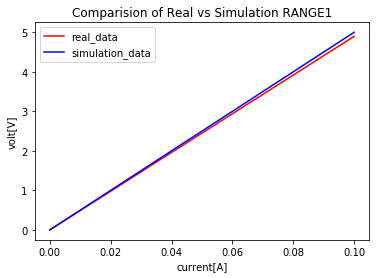

In [121]:
plt.plot(real_range1_results[1], real_range1_results[2], color= "red", label = "real_data")
plt.plot(sim_range1_results[1], sim_range1_results[2], color= "blue", label = "simulation_data")
plt.xlabel("current[A]")
plt.ylabel("volt[V]")
plt.title("Comparision of Real vs Simulation RANGE1")
plt.legend()
plt.savefig("C:\\simulation\\comparision.png")

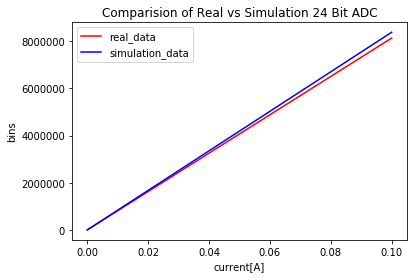

In [123]:
plt.plot(real_Adc_24bit_results[1], real_Adc_24bit_results[2], color= "red", label = "real_data")
plt.plot(sim_Adc_24bit_results[1], sim_Adc_24bit_results[2], color= "blue", label = "simulation_data")
plt.xlabel("current[A]")
plt.ylabel("bins")
plt.title("Comparision of Real vs Simulation 24 Bit ADC")
plt.legend()
plt.savefig("C:\\simulation\\comparision_24bit_ADC.png")